In [3]:
import os
from pathlib import Path
import numpy as np
import pandas as pd

root = Path("~/Documents")

for dirname, _, filenames in os.walk(root):
    for fname in filenames:
        print(os.path.join(dirname, fname))


In [4]:
train_data = pd.read_csv("/home/tae-hyun-ueon/Documents/titanic/train.csv")
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Improved: Correlation and survival rate analysis for numeric and categorical columns
import pandas as pd
import numpy as np

# Numeric columns correlation with Survived
# Gives the Pearson correlation coefficient for numeric columns
# Larger Pearson Correlation Coefficient means a stronger relationship
# For something like PClass, a higher value means a lower chance of survival
# This is because it is a negative -0.338481
numeric_corr = train_data.corr(numeric_only=True)["Survived"].sort_values(ascending=False)
print("Correlation with Survived (numeric columns):\n", numeric_corr)

# Categorical columns: show survival rate for each category (only for columns with <10 unique values)
categorical_cols = train_data.select_dtypes(include=["object", "category"]).columns
for col in categorical_cols:
    if train_data[col].nunique() < 10:
        print(f"\nSurvival rate by {col}:")
        print(train_data[[col, "Survived"]].groupby(col)["Survived"].mean())

Correlation with Survived (numeric columns):
 Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

Survival rate by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival rate by Embarked:
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


In [7]:
train_data[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Age,Survived
0,0.42,1.0
1,0.67,1.0
2,0.75,1.0
3,0.83,1.0
4,0.92,1.0
...,...,...
81,65.00,0.0
83,70.00,0.0
84,70.50,0.0
85,71.00,0.0


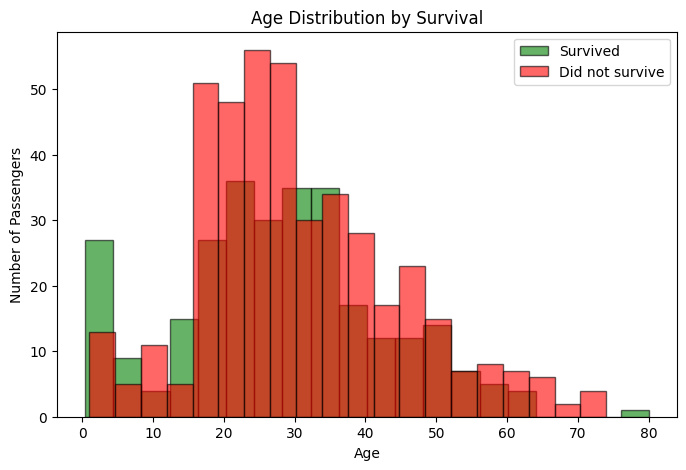

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(
    train_data[train_data["Survived"] == 1]["Age"].dropna(),
    bins=20,
    alpha=0.6,
    label="Survived",
    color="green",
    edgecolor="black"
)
plt.hist(
    train_data[train_data["Survived"] == 0]["Age"].dropna(),
    bins=20,
    alpha=0.6,
    label="Did not survive",
    color="red",
    edgecolor="black"
)
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.title("Age Distribution by Survival")
plt.legend()
plt.show()

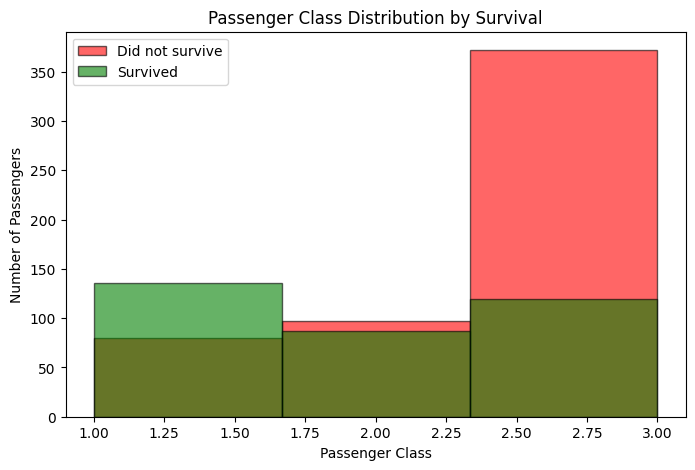

In [9]:
plt.figure(figsize=(8,5))
plt.hist(train_data[train_data["Survived"]==0]["Pclass"].dropna(),
    bins=3,
    alpha=0.6,
    label='Did not survive',
    color='red',
    edgecolor='black')
plt.hist(train_data[train_data["Survived"]==1]["Pclass"].dropna(),
    bins=3,
    alpha=0.6,
    label='Survived',
    color='green',
    edgecolor='black')

plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.title("Passenger Class Distribution by Survival")
plt.legend()
plt.show()




In [10]:
test_data = pd.read_csv("/home/tae-hyun-ueon/Documents/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women) / len(women)

print("% of women survived:", rate_women)

% of women survived: 0.7420382165605095


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

y = train_data["Survived"]

features = ["Pclass", "Sex","SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size =0.2, shuffle = False)

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(x_train, y_train)
predictions = model.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, predictions)
print("Training accuracy", accuracy_score(y_test, predictions))
print("Confusion Matrix:\n", cm)




Training accuracy 0.8379888268156425
Confusion Matrix:
 [[106   9]
 [ 20  44]]


What the Train Test Split does is to split the training data into training and testing data
Test size = 0.2 sets 20% of the training data for validation sets i.e. 80% training data and 20% validation
Random state sets the RNG seed so that the split is reproducible (same split every run)
Stratify=y ensures

In [13]:
RF_data = pd.read_csv("my_submission.csv")
RF_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
